In [1]:
import numpy as np
from sklearn.manifold import TSNE

In [3]:
X = np.array([
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,1]
])
tsen = TSNE(n_components=2)
tsen.fit_transform(X)
print(tsen.embedding_)

[[  79.55439   -237.31793  ]
 [-153.2558    -262.24918  ]
 [  54.62653     -4.5073595]
 [-178.18367    -29.43868  ]]


In [4]:
X = np.array([
    [0,0,0,0],
    [0,1,1,1],
    [1,0,1,1],
    [1,1,1,1]
])
tsen = TSNE(n_components=2)
tsen.fit_transform(X)
print(tsen.embedding_)

[[  76.4141     51.696598]
 [-114.79159   -13.005004]
 [ -51.540047  114.95013 ]
 [  13.162568  -76.25854 ]]


t-SNE: 1.9 sec


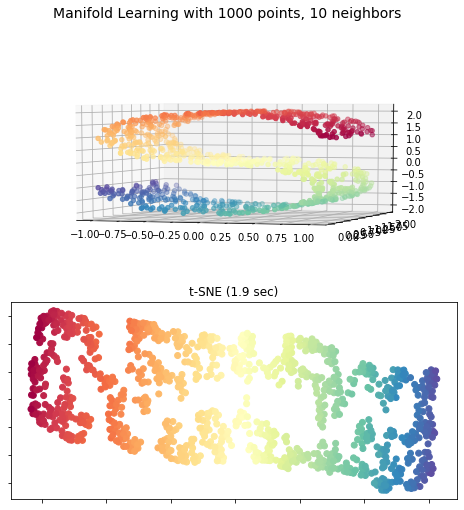

In [7]:
# coding='utf-8'
"""# 一个对S曲线数据集上进行各种降维的说明。"""
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# # Next line to silence pyflakes. This import is needed.
# Axes3D

n_points = 1000
# X是一个(1000, 3)的2维数据，color是一个(1000,)的1维数据
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(8, 8))
# 创建了一个figure，标题为"Manifold Learning with 1000 points, 10 neighbors"
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


'''绘制S曲线的3D图像'''
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)  # 初始化视角

'''t-SNE'''
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)  # 转换后的输出
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))  # 算法用时
ax = fig.add_subplot(2, 1, 2)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())  # 设置标签显示格式为空
ax.yaxis.set_major_formatter(NullFormatter())
# plt.axis('tight')

plt.show()

Computing t-SNE embedding


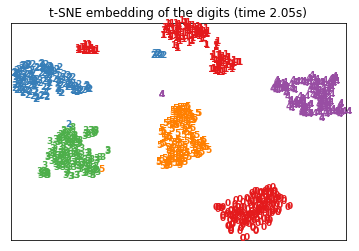

In [8]:
# coding='utf-8'
"""t-SNE对手写数字进行可视化"""
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.manifold import TSNE


def get_data():
    digits = datasets.load_digits(n_class=6)
    data = digits.data
    label = digits.target
    n_samples, n_features = data.shape
    return data, label, n_samples, n_features


def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig


def main():
    data, label, n_samples, n_features = get_data()
    print('Computing t-SNE embedding')
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    t0 = time()
    result = tsne.fit_transform(data)
    fig = plot_embedding(result, label,
                         't-SNE embedding of the digits (time %.2fs)'
                         % (time() - t0))
    plt.show(fig)


main()